# Load the dataset

In [56]:
from pandas import read_csv
import numpy as np
url = 'BankNote_Authentication.csv'
df = read_csv(url, header=None)
print(df. shape)

(1372, 5)


In [2]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# MLP

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
X,y =  df.values[:,:-1],df.values[:,-1]

In [120]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["acc"])
#save weights
checkpoint_filepath = 'checkpoints/checkpoint'+str(i)
checkpt += 1
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test,y_test),callbacks=[model_checkpoint_callback])


Epoch 1/50
29/29 [==============================] - 0s 4ms/step - loss: 2.2929 - acc: 0.3721 - val_loss: 1.9855 - val_acc: 0.3687
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 1.7693 - acc: 0.3613 - val_loss: 1.5184 - val_acc: 0.3532
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 1.3014 - acc: 0.3395 - val_loss: 1.1261 - val_acc: 0.3267
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.9651 - acc: 0.3798 - val_loss: 0.8836 - val_acc: 0.4327
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.7743 - acc: 0.5136 - val_loss: 0.7306 - val_acc: 0.5717
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6441 - acc: 0.6289 - val_loss: 0.6153 - val_acc: 0.6490
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.5456 - acc: 0.7367 - val_loss: 0.5241 - val_acc: 0.7594
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4687 - acc: 0.81

In [125]:
model.summary()

Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_353 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_354 (Dense)            (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [126]:
print("Train Accuracy", history.history['val_acc'][-1])
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Test Accuracy: %.3f' % score)
#F1 score
from sklearn.metrics import f1_score
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Train Accuracy 1.0
Test Accuracy: 1.000
F1 score: 1.000000


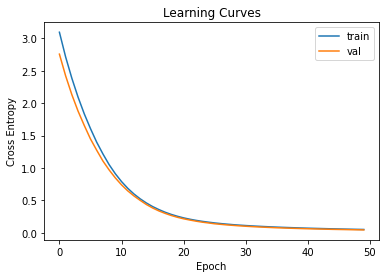

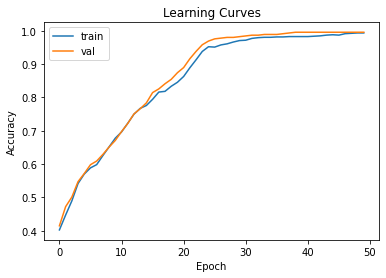

In [114]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='val')
pyplot.legend()
pyplot.show()

In [52]:
weights = model.get_weights()

In [53]:
weights

[array([[ 0.21626636,  1.1554272 , -0.6942683 , -0.09563505,  0.6748772 ,
          0.16784048, -1.6310085 , -0.76009965,  0.6927548 ,  0.52590245],
        [-0.16601916,  0.47461465, -1.1442094 , -0.06045969,  1.0175321 ,
          0.4621209 , -0.56253815, -0.45282078,  1.2367228 ,  0.41135246],
        [-0.9586735 ,  0.7135941 ,  0.5057455 , -0.14483225,  0.55072343,
         -1.0317217 , -0.26477036, -0.72562057, -0.44055665,  0.48717487],
        [-0.98186314, -0.43055275,  1.1807747 ,  0.28331566,  0.00913721,
          1.2385889 , -0.16498208,  0.46348622, -0.09314457, -0.8308867 ]],
       dtype=float32),
 array([ 0.3848539 ,  0.2137807 , -0.28291824, -0.40445253, -0.21041949,
        -0.2350299 ,  1.1042588 , -0.41344547,  0.11053111, -0.05728025],
       dtype=float32),
 array([[ 0.39529768],
        [-0.87404364],
        [-0.00365641],
        [-0.28867355],
        [-0.4629084 ],
        [-0.20570351],
        [ 0.8031783 ],
        [-0.12688959],
        [ 0.4784394 ],
   

In [121]:
print(history.history['val_acc'][-1])

1.0
